# Using Python to Download ECCO Datasets [old method]

**Note: The *ecco_download.py* module described in this tutorial has been incorporated into the new *ecco_access* library. Using [ecco_access] is recommended, rather than using the ecco_download.py module on its own. This tutorial may be removed in the near future.**

This Jupyter notebook provides an introduction to the Python [ecco_download module](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/ecco_access/ecco_download.py), with instructions and Python code for downloading a set of granules (files) for an ECCO "Dataset" hosted by PO.DAAC. The focus is on downloading datasets in the lat-lon-cap 90 (llc90) native grid of the ECCO v4 simulations, since the tutorials mostly use output on the native grid. If you're new to this grid geometry, don't worry! The ecco_v4_py package discussed in the previous tutorial will help you load the ECCO output, make computations, and plot the results while hardly needing to interact with the model grid.

The example ECCO Dataset used in this tutorial is "ECCO Sea Surface Height - Daily Mean llc90 Grid (Version 4 Release 4)" which provides daily mean sea surface height on the native llc90 grid ([10.5067/ECL5D-SSH44](https://doi.org/10.5067/ECL5D-SSH44)).

These data can also be accessed directly through [NASA Earthdata search](https://search.earthdata.nasa.gov/search?fpj=ECCO). You will need to set up a NASA Earthdata account if you do not have one already. There is [a nice graphical interface](https://www.ecco-group.org/datasets.htm) to sort through the ECCO datasets available from PO.DAAC.


## Getting Started

### Python Library Requirements

Most of the packages needed to run the `ecco_download` module are from the Python standard library. To install or update these packages, you can run either a `conda install` or `pip install` command:

```shell
$ conda install numpy pandas requests shutil time concurrent getpass http io itertools pathlib platform netrc os sys tqdm urllib
```

```shell
$ pip install numpy pandas requests shutil time concurrent getpass http io itertools pathlib platform netrc os sys tqdm urllib
```


### Earthdata Login Requirements

An account with NASA Earthdata is required. Please visit [https://urs.earthdata.nasa.gov/home](https://urs.earthdata.nasa.gov/home) to make an account and be ready with your EOSDIS login and password.

*The Earthdata Login provides a single mechanism for user registration and profile management for all EOSDIS system components (DAACs, Tools, Services). Your Earthdata login also helps the EOSDIS program better understand the usage of EOSDIS services to improve user experience through customization of tools and improvement of services. EOSDIS data are openly available to all and free of charge except where governed by international agreements.*

> **Note!**  _some Earthdata password characters may cause problems depending on your system_. To be safe, do not use any of the following characters in your password: backslash (\\), space, hash (#), quotes (single or double), or greater than (>).  Set/change your Earthdata password here: [https://urs.earthdata.nasa.gov/change_password](https://urs.earthdata.nasa.gov/change_password)

1. After creating a NASA Earthdata account, create a file called ```.netrc``` in your home directory (linux, Mac):
```
/home/<username>/.netrc
```
or ```_netrc``` (Windows):
```
C:\Users\<username>\_netrc
```

The ```netrc``` file must have the following structure and must include your Earthdata account login name and password:

```
machine urs.earthdata.nasa.gov
    login <your username>
    password <your password>
```

2. Set permissions on your ```netrc``` file to be readable only by the current user.  If not, you will receive the error "netrc access too permissive." 

```shell
$ chmod 0600 ~/.netrc
```

## ECCO output structure on PO.DAAC (NASA Earthdata Cloud)

On PO.DAAC and in the NASA Earthdata Cloud, ECCO output is organized in the following hierarchy:

- **Dataset:** Typically contains a few variables, spanning the time range of the ECCO v4r4 output (currently 1992-2017). Most datasets are divided (in the time dimension) into hundreds or thousands of granules.

    - **Granule:** Dataset variables at a specific time (monthly mean, daily mean, or snapshot). Exceptions are 1-D time series where the entire dataset only consists of one granule.

        - **Variable:** A specific geophysical parameter (or flux) representing the state of the ocean, atmosphere, or sea ice/snow cover. Individual variables are not visible through the NASA Earthdata website, but can be seen after a granule file has been opened.


Each dataset has a dataset code called a `ShortName` which is used to identify it on the cloud. In order to download particular variable(s), you need to identify the `ShortName` associated with the dataset containing those variables. You can search for the variables in the linked text files below, or download these files for your reference.

### Dataset ShortNames and variables associated with them

[ECCO v4r4 llc90 Grid Dataset Variables - Monthly Means](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/varlist/v4r4_nctiles_monthly_varlist.txt)

[ECCO v4r4 llc90 Grid Dataset Variables - Daily Means](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/varlist/v4r4_nctiles_daily_varlist.txt)

[ECCO v4r4 llc90 Grid Dataset Variables - Daily Snapshots](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/varlist/v4r4_nctiles_snapshots_varlist.txt)

[ECCO v4r4 0.5-Deg Interp Grid Dataset Variables - Monthly Means](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/varlist/v4r4_latlon_monthly_varlist.txt)

[ECCO v4r4 0.5-Deg Interp Grid Dataset Variables - Daily Means](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/varlist/v4r4_latlon_daily_varlist.txt)

[ECCO v4r4 Time Series and Grid Parameters](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/varlist/v4r4_tseries_grid_varlist.txt)


Note that unlike earlier releases of ECCO v4, in v4r4 all monthly mean variables are also available for download as daily means. Snapshots (typically at daily intervals) are available for a few variables, and can be used to help close budgets as shown in later tutorials.

## ECCO_download module: the quick and easy method

If you are already broadly familiar with Python and want a quick way to download ECCO output, and have edited your `netrc` file as described [above](#Earthdata-Login-Requirements), you can use the `ecco_download` module.

[ecco_download module](https://raw.githubusercontent.com/ECCO-GROUP/ECCO-v4-Python-Tutorial/master/ecco_access/ecco_download.py)

You can save this file either in the same directory where you store the tutorial notebooks, or a different directory that you then add to your path using `sys.path.append`. Then import it to your code using `from ecco_download import *` and call the function `ecco_podaac_download` to start downloading. You will need to know the ShortName of the dataset you want, which you can look up using the variable lists [linked above](#Dataset-ShortNames-and-variables-associated-with-them). To see the syntax of the `ecco_podaac_download` function use `help(ecco_podaac_download)`, or consider the example below where we download daily SSH data for the week 2000-01-08 to 2000-01-14 inclusive:

In [1]:
from ecco_download import *

ecco_podaac_download(ShortName="ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4",\
                    StartDate="2000-01-08",EndDate="2000-01-14",download_root_dir=None,\
                    n_workers=6,force_redownload=False)

created download directory C:\Users\adelman\Downloads\ECCO_V4r4_PODAAC\ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4

Total number of matching granules: 7
DL Progress: 100%|###########################| 7/7 [00:06<00:00,  1.11it/s]

total downloaded: 41.48 Mb
avg download speed: 6.53 Mb/s
Time spent = 6.354791879653931 seconds


The `ecco_download` module also includes a function `ecco_podaac_download_subset` that has a number of options for spatially and temporally subsetting ECCO output prior to downloading. For more information on how to use this function see the [Downloading Subsets of ECCO Datasets](https://ecco-v4-python-tutorial.readthedocs.io/Downloading_Subsets_of_ECCO_Datasets.html) tutorial.

The rest of this tutorial below walks through the steps that are included in the `ecco_podaac_download` function, and uses the data downloaded to make a plot at the end.

## Downloading ECCO output step-by-step

### Initialize Python libraries

In [2]:
import numpy as np
import pandas as pd
import requests
import shutil
import time as time
from os.path import join,expanduser
user_home_dir = expanduser('~')

# xarray is used to read and plot the downloaded NetCDF files
import xarray as xr
import sys

import matplotlib.pyplot as plt

# for concurrent simultaneous downloads
from concurrent.futures import ThreadPoolExecutor
from getpass import getpass
from http.cookiejar import CookieJar
from io import StringIO
from itertools import repeat
from pathlib import Path
from platform import system
from netrc import netrc
from os.path import basename, isfile, isdir
# progress bar
from tqdm import tqdm
# library to download files
from urllib import request

# Predict the path of the netrc file depending on os/platform type.
_netrc = join(user_home_dir, "_netrc" if system()=="Windows" else ".netrc")

# load the ecco_v4_py package
# here is is assumed to be installed in /home/user/ECCOv4-py
# change as needed for your setup
sys.path.append(join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

> **Note: if you encounter any errors such as ModuleNotFoundError, try running conda install -c conda-forge {package_name} to install or update the required package.**  For example, given the error:
> 
> ```ModuleNotFoundError```: No module named 'xmitgcm.file_utils'
> 
> Run conda install to update the xmitgcm package:
> 
> conda install -c conda-forge xmitgcm

### Define Helper Subroutines

#### Helper subroutine to log into NASA EarthData 

In [3]:
# not pretty but it works
def setup_earthdata_login_auth(url: str='urs.earthdata.nasa.gov'):
    # look for the netrc file and use the login/password
    try:
        username, _, password = netrc(file=_netrc).authenticators(url)

    # if the file is not found, prompt the user for the login/password
    except (FileNotFoundError, TypeError):
        print('Please provide Earthdata Login credentials for access.')
        username, password = input('Username: '), getpass('Password: ')
    
    manager = request.HTTPPasswordMgrWithDefaultRealm()
    manager.add_password(None, url, username, password)
    auth = request.HTTPBasicAuthHandler(manager)
    jar = CookieJar()
    processor = request.HTTPCookieProcessor(jar)
    opener = request.build_opener(auth, processor)
    request.install_opener(opener)

#### Helper subroutines to make the API calls to search CMR and parse response

In [4]:
def set_params(params: dict):
    params.update({'scroll': "true", 'page_size': 2000})
    return {par: val for par, val in params.items() if val is not None}

def get_results(params: dict, headers: dict=None):
    response = requests.get(url="https://cmr.earthdata.nasa.gov/search/granules.csv", 
                            params=set_params(params),
                            headers=headers)
    return response, response.headers


def get_granules(params: dict):
    response, headers = get_results(params=params)
    scroll = headers['CMR-Scroll-Id']
    hits = int(headers['CMR-Hits'])
    if hits==0:
        raise Exception("No granules matched your input parameters.")
    df = pd.read_csv(StringIO(response.text)) 
    while hits > df.index.size:
        response, _ = get_results(params=params, headers={'CMR-Scroll-Id': scroll})
        data = pd.read_csv(StringIO(response.text))
        df = pd.concat([df, data])
    return df

#### Helper subroutine to gracefully download single files and avoids re-downloading if file already exists.  

In [5]:
# To force redownload of the file, pass **True** to the boolean argument *force* (default **False**)
def download_file(url: str, output_dir: str, force: bool=False):
    """
    url (str): the HTTPS url from which the file will download
    output_dir (str): the local path into which the file will download
    force (bool): download even if the file exists locally already
    """
    if not isdir(output_dir):
        raise Exception(f"Output directory doesnt exist! ({output_dir})")
    
    target_file = join(output_dir, basename(url))
    
    # if the file has already been downloaded, skip    
    if isfile(target_file) and force is False:
        print(f'\n{basename(url)} already exists, and force=False, not re-downloading')
        return 0
    
    with requests.get(url) as r:
        if not r.status_code // 100 == 2: 
            raise Exception(r.text)
            return 0
        else:
            with open(target_file, 'wb') as f:
                total_size_in_bytes= int(r.headers.get('content-length', 0))
                for chunk in r.iter_content(chunk_size=1024):
                    if chunk:
                        f.write(chunk)

                return total_size_in_bytes

#### Helper subroutine to download all urls in the list `dls`

In [6]:
def download_files_concurrently(dls, download_dir, force=False):
    start_time = time.time()

    # use 3 threads for concurrent downloads
    with ThreadPoolExecutor(max_workers=max_workers) as executor:

        # tqdm makes a cool progress bar
        results = list(tqdm(executor.map(download_file, dls, repeat(download_dir), repeat(force)),\
                            total=len(dls), desc='DL Progress', ascii=True, ncols=75, file=sys.stdout))
    
        # add up the total downloaded file sizes
        total_download_size_in_bytes = np.sum(np.array(results))
        # calculate total time spent in the download
        total_time = time.time() - start_time

        print('\n=====================================')
        print(f'total downloaded: {np.round(total_download_size_in_bytes/1e6,2)} Mb')
        print(f'avg download speed: {np.round(total_download_size_in_bytes/1e6/total_time,2)} Mb/s')

### Download granules of an ECCO dataset falling within a specific date range

### Define dataset parameters

To download using the code below, specify the ECCO dataset `ShortName`, and a desired date range using `StartDate` and `EndDate`.  

In this example we look for the dataset containing daily mean SSH, with granules matching a 7-day range (inclusive), January 1, 2000 to January 7, 2000.

>Note: Previously the `ecco_download` module would also include the day (or sometimes the month) before the StartDate, when downloading daily or monthly mean granules. As of the Dec. 2023 update, the first granule should correspond with the day or month of the given StartDate.

In [7]:
# ECCO dataset ShortName
ShortName = "ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4"

# desired date range
StartDate = "2000-01-01"
EndDate   = "2000-01-07"


# # Dec. 2023 update: StartDate/EndDate adjustments
# for monthly and daily datasets, do not include the month or day before
if (('MONTHLY' in ShortName) or ('DAILY' in ShortName)):
    StartDate = str(np.datetime64(StartDate,'D') + np.timedelta64(1,'D'))
# for snapshot datasets, move EndDate one day later
if 'SNAPSHOT' in ShortName:
    EndDate = str(np.datetime64(EndDate,'D') + np.timedelta64(1,'D'))

### Define download directory

**Change the `download_root_dir` for your system!**

The download_root_dir is currently set under the user's home directory, but can also be changed to a path outside the user's home directory, e.g. download_root_dir = Path('/mnt/Downloads/ECCO_V4r4_PODAAC')

In [8]:
# define root directory for downloaded NetCDF files
download_root_dir = Path(user_home_dir + '/Downloads/ECCO_V4r4_PODAAC')

# define the directory where the downloaded files will be saved
download_dir = download_root_dir / ShortName

# create the download directory
download_dir.mkdir(exist_ok = True, parents=True)

print(f'created download directory {download_dir}')

created download directory C:\Users\adelman\Downloads\ECCO_V4r4_PODAAC\ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4


### Log into Earthdata using your username and password

In [9]:
# actually log in with this command:
setup_earthdata_login_auth()

### Search NASA's "Common Metadata Repository" for the ECCO dataset

Query the NASA Common Metadata Repository to find the URL of every granule associated with the desired ECCO Dataset and date range of interest.

In [10]:
# create a Python dictionary with our search criteria:  `ShortName` and `temporal`
input_search_params = {'ShortName': ShortName,
                       'temporal': ",".join([StartDate, EndDate])}

print(input_search_params)

{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4', 'temporal': '2000-01-02,2000-01-07'}


#### Query CMR for the desired ECCO Dataset

Call `get_granules` with the `input_search_params` dictionary argument. The result is a Pandas dataframe with granule metadata results in table form.

In [11]:
# grans means 'granules', PO.DAAC's term for individual files in a dataset
grans = get_granules(input_search_params)

# what did we find? --- 8 granules!
grans.info()

num_grans = len( grans['Granule UR'] )
print (f'\nTotal number of matching granules: {num_grans}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Granule UR           7 non-null      object 
 1   Producer Granule ID  0 non-null      float64
 2   Start Time           7 non-null      object 
 3   End Time             7 non-null      object 
 4   Online Access URLs   7 non-null      object 
 5   Browse URLs          0 non-null      float64
 6   Cloud Cover          0 non-null      float64
 7   Day/Night            7 non-null      object 
 8   Size                 7 non-null      float64
dtypes: float64(4), object(5)
memory usage: 632.0+ bytes

Total number of matching granules: 7


### Download the granules

In [12]:
# convert the rows of the 'Online Access URLS' column to a Python list
dls = grans['Online Access URLs'].tolist()

# the url of the first file is
print(dls[0])

https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/ECCO_L4_SSH_LLC0090GRID_DAILY_V4R4/SEA_SURFACE_HEIGHT_day_mean_2000-01-01_ECCO_V4r4_native_llc0090.nc


#### Method 1: Concurrent downloads

Define the maximum number of concurrent downloads (benefits typically taper off above 5-6)

In [13]:
max_workers = 6

Execute the download command

In [14]:
# Ex 1) Force redownload if the file exists
force=True
download_files_concurrently(dls, download_dir, force)

DL Progress: 100%|###########################| 7/7 [00:07<00:00,  1.01s/it]

total downloaded: 41.49 Mb
avg download speed: 5.82 Mb/s


In [15]:
# Ex 2) Do not force redownload if the file exists
force=False
download_files_concurrently(dls, download_dir, force)


SEA_SURFACE_HEIGHT_day_mean_2000-01-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_day_mean_2000-01-07_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|#########################| 7/7 [00:00<00:00, 7020.59it/s]

total downloaded: 0.0 Mb
avg download speed: 0.0 Mb/s


#### Method 2: Sequential Downloads

Download each URL sequentially in a for loop.

In [16]:
total_download_size_in_bytes = 0
start_time = time.time()

# force file download for demonstration purposes
force = True

# loop through all urls in dls
for u in dls:
    u_name = u.split('/')[-1]
    print(f'downloading {u_name}')
    total_download_size_in_bytes += download_file(url=u, output_dir=download_dir, force=force)

# calculate total time spent in the download
total_time = time.time() - start_time

print('\n=====================================')
print(f'total downloaded: {np.round(total_download_size_in_bytes/1e6,2)} Mb')
print(f'avg download speed: {np.round(total_download_size_in_bytes/1e6/total_time,2)} Mb/s')

downloading SEA_SURFACE_HEIGHT_day_mean_2000-01-01_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_day_mean_2000-01-02_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_day_mean_2000-01-03_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_day_mean_2000-01-04_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_day_mean_2000-01-05_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_day_mean_2000-01-06_ECCO_V4r4_native_llc0090.nc
downloading SEA_SURFACE_HEIGHT_day_mean_2000-01-07_ECCO_V4r4_native_llc0090.nc

total downloaded: 41.49 Mb
avg download speed: 1.73 Mb/s


### Check downloads

Get the list of files:

In [17]:
ecco_netcdf_files = list(download_dir.glob('*nc'))

print(f'number of downloaded files {len(ecco_netcdf_files)}')

number of downloaded files 7


## Plotting llc90 grid output on a global lon-lat map

Now open and combine all NetCDF files together using the `xarray.open_mfdataset` function:

In [18]:
xds = xr.open_mfdataset(ecco_netcdf_files, parallel=True, data_vars='minimal',\
                                  coords='minimal', compat='override')

print(xds)

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 13, time: 7, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-01-07T12:00:00
    ...         ...
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 dask

In [19]:
# select variable to plot from dataset
var_to_plot = 'SSH'
dataarray_plot = eval('xds.' + var_to_plot)

# compute the time mean over the downloaded files
time_mean = dataarray_plot.mean('time').compute()

20.125 179.875
20.0 180.0
-89.875 89.875
-90.0 90.0
-179.87484356070087 19.874833560700864
-180.0 19.99999
-89.875 89.875
-90.0 90.0


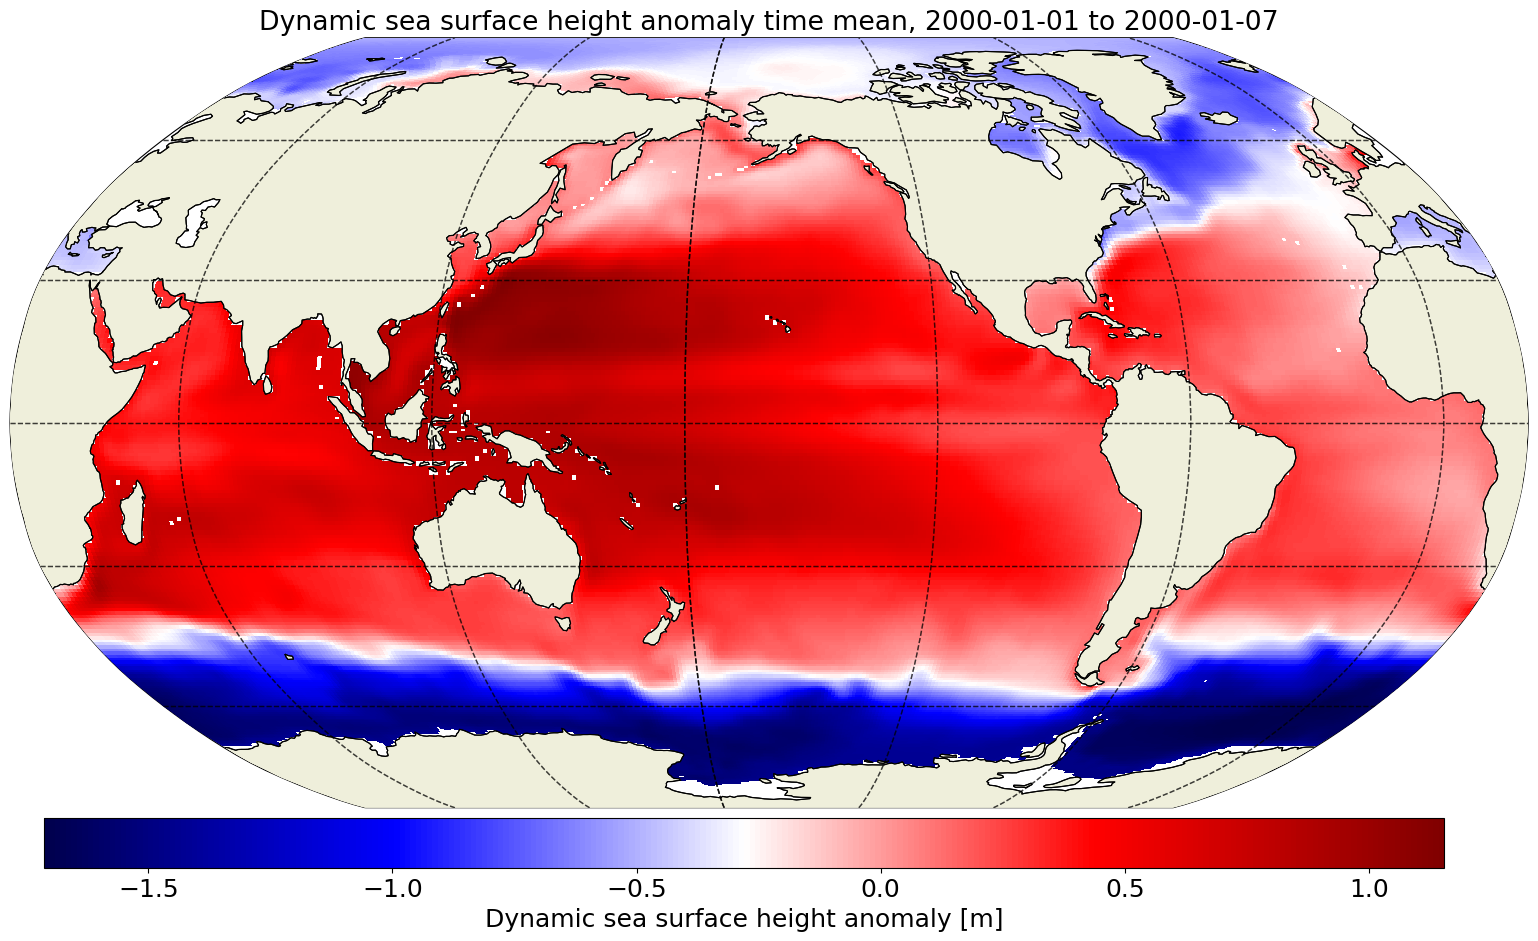

In [20]:
# use ecco_v4_py function to plot native grid data on lat-lon map
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=[20,10])
time_values = dataarray_plot.time.data
title_str = dataarray_plot.long_name + ' time mean, ' + str(time_values[0])[:10] + ' to ' + str(time_values[-1])[:10]
# scalar quantities generally have coordinates XC and YC for longitude and latitude respectively
# vectors (e.g. velocities, fluxes) have different coordinates; see Coordinates tutorial for more detail
plot_obj = ecco.plot_proj_to_latlon_grid(dataarray_plot.XC, dataarray_plot.YC, time_mean, show_colorbar=False, user_lon_0=200, cmap='seismic')
plt.title(title_str)
# create horizontal colorbar with label
cax = plt.axes([0.15,0.05,0.7,0.05])
cbar = plt.colorbar(plot_obj[2],cax=cax,orientation='horizontal')
cbar.set_label(dataarray_plot.long_name + ' [' + dataarray_plot.units + ']',fontsize=18)
cax.tick_params(labelsize=18)

20.125 179.875
20.0 180.0
-89.875 89.875
-90.0 90.0
-179.87484356070087 19.874833560700864
-180.0 19.99999
-89.875 89.875
-90.0 90.0


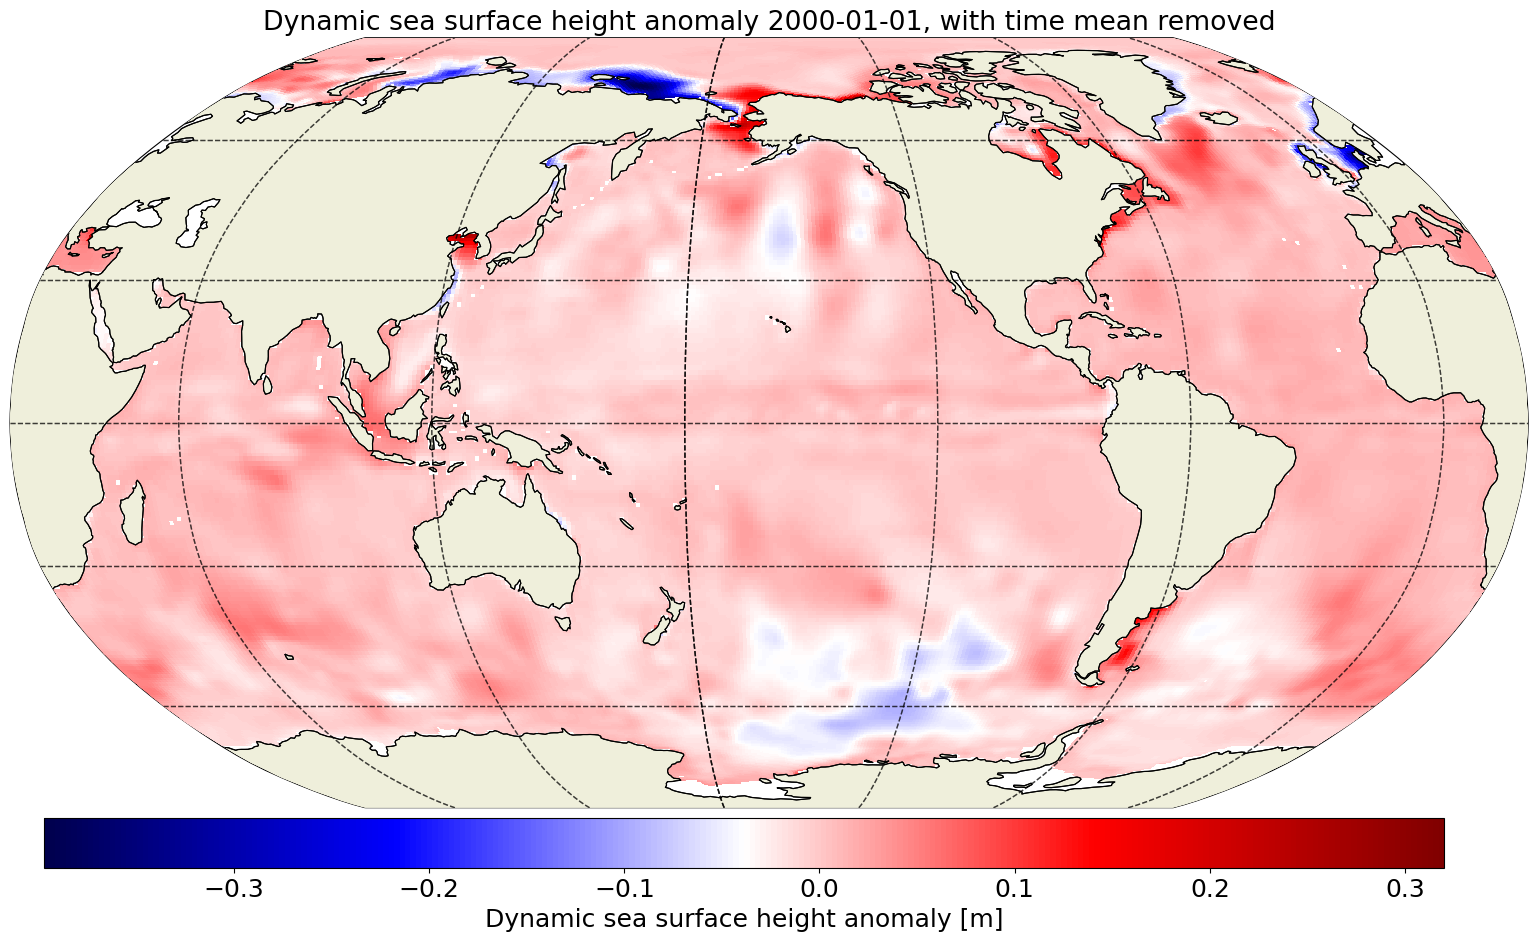

In [21]:
# Plot the anomaly of the first record (time_ind = 0) relative to the time mean
time_ind = 0
fig = plt.figure(figsize=[20,10])
title_str = dataarray_plot.long_name + ' ' + str(time_values[time_ind])[:10] + ', with time mean removed'
plot_obj = ecco.plot_proj_to_latlon_grid(dataarray_plot.XC, dataarray_plot.YC, dataarray_plot.isel(time=time_ind) - time_mean, show_colorbar=False, user_lon_0=200, cmap='seismic')
plt.title(title_str)
cax = plt.axes([0.15,0.05,0.7,0.05])
cbar = plt.colorbar(plot_obj[2],cax=cax,orientation='horizontal')
cbar.set_label(dataarray_plot.long_name + ' [' + dataarray_plot.units + ']',fontsize=18)
cax.tick_params(labelsize=18)